# Sentiment Analysis and Project Decription

## About Dataset
### Context
> This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

*Contents
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite
database.sqlite: Contains the table 'Reviews'*

**Data includes:**

Reviews from Oct 1999 - Oct 2012
568,454 reviews
256,059 users
74,258 products
260 users with > 50 reviews

About the dataset being used. The kaggle notebook editor doesnt load well for some geographical regions so i used google collab.

## [POS NLTK EXAMPLES](https://www.guru99.com/pos-tagging-chunking-nltk.html)

# Importing the Datasets and some NLTK Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import json
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
import transformers
import torch

In [174]:
#loading the dataset into pandas dataframe

df = pd.read_csv('E:\FGOGGLECOLLAB\Reviews.csv')

In [175]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [176]:
print(df.shape)

(568454, 10)


In [177]:
df['Text'].values[0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

We're gonna run our **Sentiment Analysis** on this row of our entire dataset.

In [178]:
#since it's a lot of data.
df = df.head(500)
print(df.shape)

(500, 10)


In [179]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## A short Exploratory Data Analysis

generateing a bar plot to visualize the distribution of review scores in the DataFrame .The x-axis represents the different review scores, while the y-axis represents the count of reviews with each score.

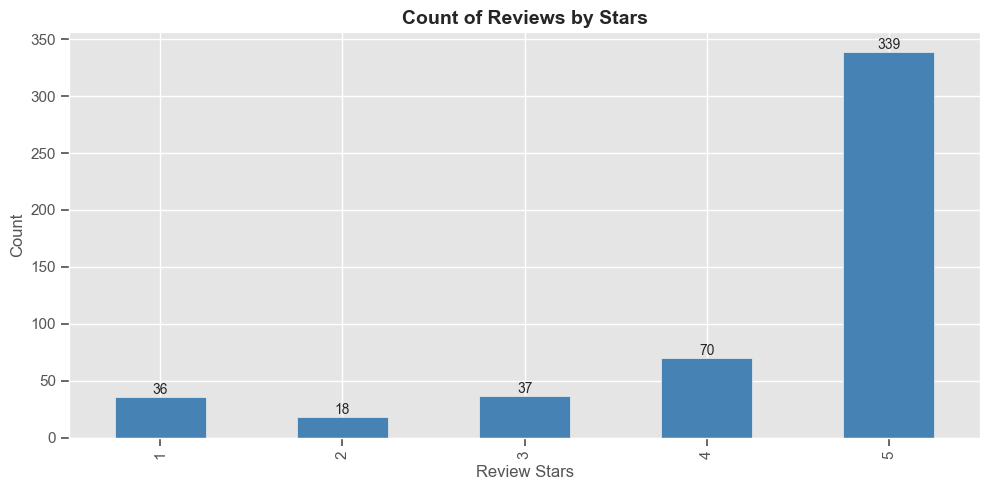

In [180]:
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

ax = df['Score'].value_counts().sort_index().plot(kind='bar', color='steelblue')

ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')
ax.set_title('Count of Reviews by Stars', fontsize=14, fontweight='bold')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between plot elements
plt.show()

# Basic NLTK

In [181]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


A negative sentiment here

Things we can do with NLTK

The code nltk.word_tokenize(example) is using the Natural Language Toolkit (NLTK) library in Python to perform word tokenization on a text string stored in the variable example.

Word tokenization is the process of splitting a text into individual words or tokens. It is a common pre-processing step in natural language processing and text analysis tasks. The NLTK library provides various tokenizers, and nltk.word_tokenize() is one of them.

By calling nltk.word_tokenize(example), the code will tokenize the text in example and return a list of tokens, where each token represents a separate word in the text. The tokens can include not only words but also punctuation marks and other elements depending on the specific tokenizer being used.

For example, if example contains the string "Hello, how are you?", the code nltk.word_tokenize(example) will return the list ['Hello', ',', 'how', 'are', 'you', '?'], where each element represents a token from the original text.

## *applying word tokenization to a text*

The tokens below represent individual words, punctuation marks, and contractions. The above tokenization process separates the text into meaningful units, making it easier to analyze or process further.

In [182]:
# also returning the first 10 tokens from the list
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [183]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

the above code utilizes the NLTK library to perform part-of-speech tagging on a list of tokens stored in the variable tokens.


In the context of part-of-speech tagging, each element in the tagged list represents a tuple where the first element is a token (word) from the original text, and the second element is its corresponding part-of-speech tag.

For example, tagged[:10]  returned the first 10 tagged tokens from the list.
The tagged tokens in our result provide information about the grammatical category or part of speech of each word in the text. In this case, the second element of each tuple represents the part-of-speech tag assigned to the corresponding word.

Here are the part-of-speech tags used in the example above:

'DT': determiner
'NN': noun, singular or mass
'VBZ': verb, third-person singular present
'RB': adverb
'JJ': adjective
'.': punctuation mark
'PRP$': pronoun, possessive
',': punctuation mark

In [184]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)
entities[:12]

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP')]

#VADER SENTIMENT SCORING
Using NLTK's **SentimentIntesityAnalyzer** to get the neg/neu/pos scores of the text.
* This uses "bag of words" approach:


1.   Stop words are removed.
2.   Each word is scored and combined to a total score.



### importing two Python libraries: **nltk.sentiment and tqdm.notebook.**

In [185]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()



The nltk.sentiment library is a part of the Natural Language Toolkit (NLTK), which is a popular library for working with human language data in Python. In this case, we specifically imported the SentimentIntensityAnalyzer class from nltk.sentiment. The SentimentIntensityAnalyzer is a pre-trained model that is commonly used for sentiment analysis, which involves determining the sentiment (positive, negative, or neutral) of a given text.

The tqdm.notebook library is a progress bar library that provides a way to track the progress of iterative processes, such as loops. It is particularly useful when we want to visualize the progress of a loop in Jupyter Notebook or JupyterLab environments in this case GoogleCollab. By **importing tqdm.notebook**, we gain access to the tqdm function, which we can  use  to wrap your loops and generate progress bars.



Running Some *examples*

In [186]:
sia.polarity_scores('I am so hungry')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The code sia.polarity_scores('I am so hungry') uses the SentimentIntensityAnalyzer object (sia) to analyze the sentiment of the given text: "I am so hungry".

The polarity_scores() method of the SentimentIntensityAnalyzer class calculates the sentiment scores for the input text. It returns a dictionary that contains four key-value pairs:

> 'neg': The negative sentiment score, which represents the probability of negative sentiment in the text. In this case, it is 0.0, indicating no negative sentiment.

> 'neu': The neutral sentiment score, which represents the probability of neutral sentiment in the text. Here, it is 1.0, indicating complete neutrality.

> 'pos': The positive sentiment score, which represents the probability of positive sentiment in the text. It is 0.0, indicating no positive sentiment.

> 'compound': The compound sentiment score, which is a normalized score that combines the positive, negative, and neutral scores. In this case, it is also 0.0, suggesting a neutral sentiment overall.

Therefore, the output of sia.polarity_scores('I am so hungry') is {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}.
This indicates that the text "I am so hungry" is perceived as completely neutral according to the sentiment analysis performed by the SentimentIntensityAnalyzer

In [187]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

> the output of sia.polarity_scores('I am so happy') is {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}.

> This indicates that the text "I am so happy" is perceived as positive overall according to the sentiment analysis performed by the SentimentIntensityAnalyzer. The positive sentiment score is relatively high, while there is also a moderate amount of neutrality present.

In [188]:
sia.polarity_scores('This is the worst thing ever')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

 > the output of sia.polarity_scores('I am so happy') is {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}.

> This indicates that the text "I am so happy" is perceived as having a positive sentiment overall according to the sentiment analysis performed by the SentimentIntensityAnalyzer.

> The positive sentiment score is relatively high, while there is also a moderate amount of neutrality present.

Let's run it on our ***example*** from before

In [189]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [190]:
len(df)

500

### Iterating over the rows of a DataFrame (df) using the iterrows() method.
> Within each iteration, it retrieves the 'Text' and 'Id' values from the current row and performs sentiment analysis on the text using the sia.polarity_scores() method. The resulting sentiment scores are then stored in a dictionary (res) with the 'Id' value as the key.

In [191]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm (df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)



  0%|          | 0/500 [00:00<?, ?it/s]

That was fast





> res = {}: Initializes an empty dictionary to store the sentiment scores.

> for i, row in tqdm(df.iterrows(), total=len(df)):: Iterates over each row of the DataFrame using iterrows(). The tqdm() function wraps the iteration and provides a progress bar. The total parameter is set to the length of the DataFrame (len(df)) to indicate the total number of iterations.

 **Inside the loop:**

> text = row['Text']: Retrieves the value of the 'Text' column from the current row.
> myid = row['Id']: Retrieves the value of the 'Id' column from the current row.
> res[myid] = sia.polarity_scores(text): Performs sentiment analysis on the text using > sia.polarity_scores(), and stores the resulting sentiment scores in the res dictionary with myid as the key.

By the end of the loop, the res dictionary will contain sentiment scores for each 'Id' value in the DataFrame df. The sentiment scores can be accessed using the corresponding 'Id' as the key in the res dictionary.

In [192]:
print(res)


{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

> *the contents of the **res** dictionary, which contains the sentiment scores for each 'Id' value from the DataFrame df. The output  shows the key-value pairs in the dictionary, where the keys are the **'Id'** values and the values are the **corresponding sentiment scores**.*

In [193]:
#creating a pandas DataFrame from the res dictionary and then transposing it.
vaders = pd.DataFrame(res).T
#Resetting the index and renaming a column in the vaders DataFrame,
vaders = vaders.reset_index().rename(columns ={'index':'Id'})
#Merging it with the df DataFrame using a left join to combine the
#data based on a common column ('Id').

vaders = vaders.merge(df,how = 'left')

> .T: This is the transpose operation applied to the DataFrame. It flips the rows and columns of the DataFrame, effectively transposing the DataFrame. The rows become columns, and the columns become rows.

By applying .T to the DataFrame created from the res dictionary, the resulting DataFrame  had the sentiment scores as rows, and the 'Id' values as columns. Now we can access and manipulate the **sentiment** scores based on the corresponding **'Id'** values.

In [194]:
#Now that we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting  VADER Results

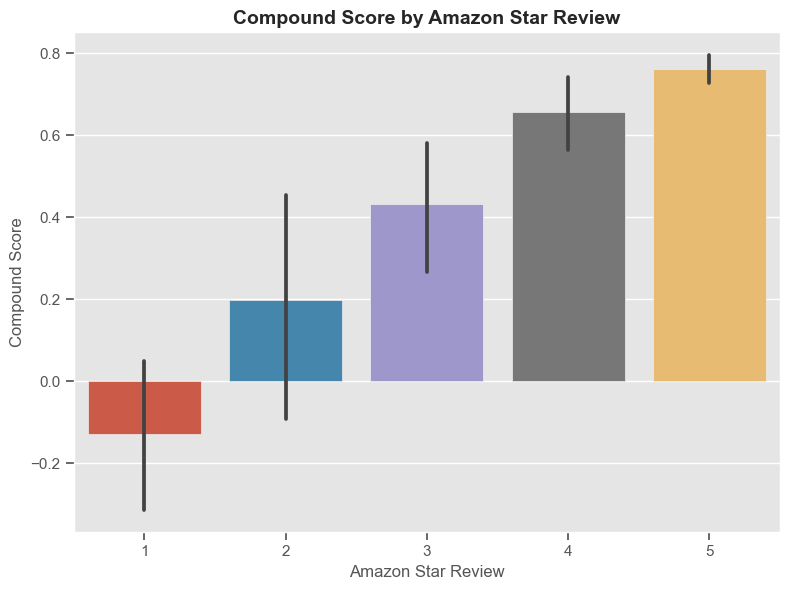

In [195]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_xlabel('Amazon Star Review')
ax.set_ylabel('Compound Score')
ax.set_title('Compound Score by Amazon Star Review', fontsize=14, fontweight='bold')

# Rotate x-axis labels if there are many categories
if len(vaders['Score'].unique()) > 6:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # Improve spacing between plot elements
plt.show()


1 has lower compound score
5 has higher


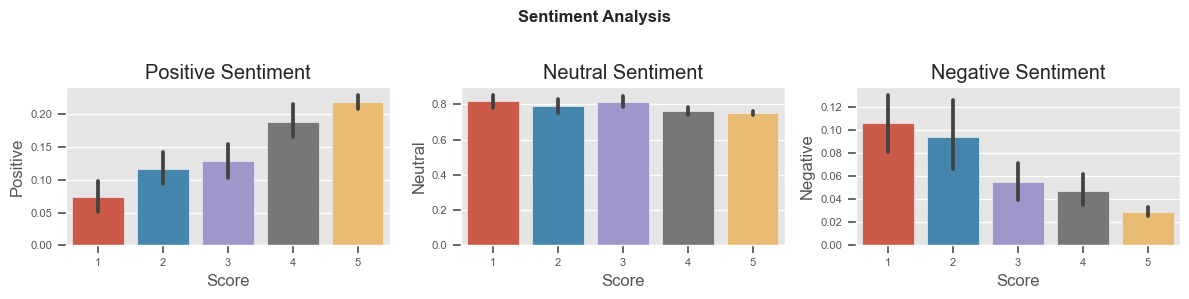

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

ax = sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
ax.set_xlabel('Score')
ax.set_ylabel('Positive')
ax.set_title('Positive Sentiment')
ax.tick_params(axis='both', labelsize=8)

ax = sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
ax.set_xlabel('Score')
ax.set_ylabel('Neutral')
ax.set_title('Neutral Sentiment')
ax.tick_params(axis='both', labelsize=8)

ax = sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
ax.set_xlabel('Score')
ax.set_ylabel('Negative')
ax.set_title('Negative Sentiment')
ax.tick_params(axis='both', labelsize=8)

fig.suptitle('Sentiment Analysis', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add spacing between subplots and title
plt.show()

We can see that that positivity is higer as the score is higher in terms of stars,
The neutral is kind of flat
And the negative comes down , it becomes less negative of a comment as the star review becomes higher.

This just confirms what we had hoped to see, VADER is just valuable in having this connection between the score of the text and the sentiment score and it does relate to the actual rating review of the reviewers.

#Roberta Pretrained Model


*   Use a model trained of a large corpus of data
*   Transformer model accounts for the words but also the context related to other words.



Our previous model **VEDAR** just looked at each word in the sentence in the review and scored each word individually.**but human language depends a lot on context** , so If we say a sentence that could have negative words that could be sarcastic or related to other words in which way it makes it a positive statement. The VADER model would not pick up on such relationship between words, but more and more recently these transformer based Deep learning models have become very popular because they can pick up on that context.


# *So we are gonna use , from [HuggingFace](https://huggingface.co/)*

## [ROBERTA](https://https://huggingface.co/docs/transformers/model_doc/roberta)
> It is a transformer-based model that is pretrained on a large corpus of text data. It learns to understand the contextual relationships between words by training on various language modeling tasks, such as masked word prediction and next sentence prediction.


In [197]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax           


Pulling in a very specific model that has been pretrained on a a big chunk of data

## Sentiment analysis using the CardiffNLP implementation of the **RoBERTa** model trained on Twitter data. 
Let's break it down step by step:

> MODEL = "cardiffnlp/twitter-roberta-base-sentiment": This line defines the model to be used for sentiment analysis. The specified model is the CardiffNLP implementation of the RoBERTa model, which has been trained on Twitter data specifically for sentiment analysis.

> tokenizer = AutoTokenizer.from_pretrained(MODEL): This line initializes the tokenizer for the specified model. The tokenizer is responsible for converting raw text into tokens that the model can understand. The AutoTokenizer.from_pretrained method loads the tokenizer associated with the specified model.

> model = AutoModelForSequenceClassification.from_pretrained(MODEL): This line initializes the model for sequence classification using the specified model. The AutoModelForSequenceClassification.from_pretrained method loads the pre-trained model, which has been fine-tuned for sentiment analysis on Twitter data. This model is capable of classifying text sequences into different sentiment categories (e.g., positive, negative, neutral).

In summary, the code sets up a sentiment analysis pipeline using the CardiffNLP implementation of the RoBERTa model trained on Twitter data. It loads the tokenizer and the pre-trained model, which can be used to analyze the sentiment of text sequences.

In [198]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [199]:
#VADER results on example
sia.polarity_scores(example)
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [200]:
#Run for Roberta Model
encoded_text = tokenizer(example,return_tensors='pt')
#using the encoded text and running our model on it
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta-neg':scores[0],
    'roberta-neu':scores[1],
    'roberta-pos':scores[2]
}
print(scores_dict)

{'roberta-neg': 0.97635514, 'roberta-neu': 0.020687453, 'roberta-pos': 0.0029573666}


Already we can see how the roberta model is just powerful than the VADER model

###Let's go ahead and run this on the entire dataset like we did above with the VADER model

In [201]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    #using the encoded text and running our model on it
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta-neg':scores[0],
        'roberta-neu':scores[1],
        'roberta-pos':scores[2]
    }
    return scores_dict

#Iterating the dataset and Combining the two result VADER AND ROBERTA

In [202]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [203]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [204]:

print(results_df.columns)

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta-neg', 'roberta-neu', 'roberta-pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


# comparing scores  between models


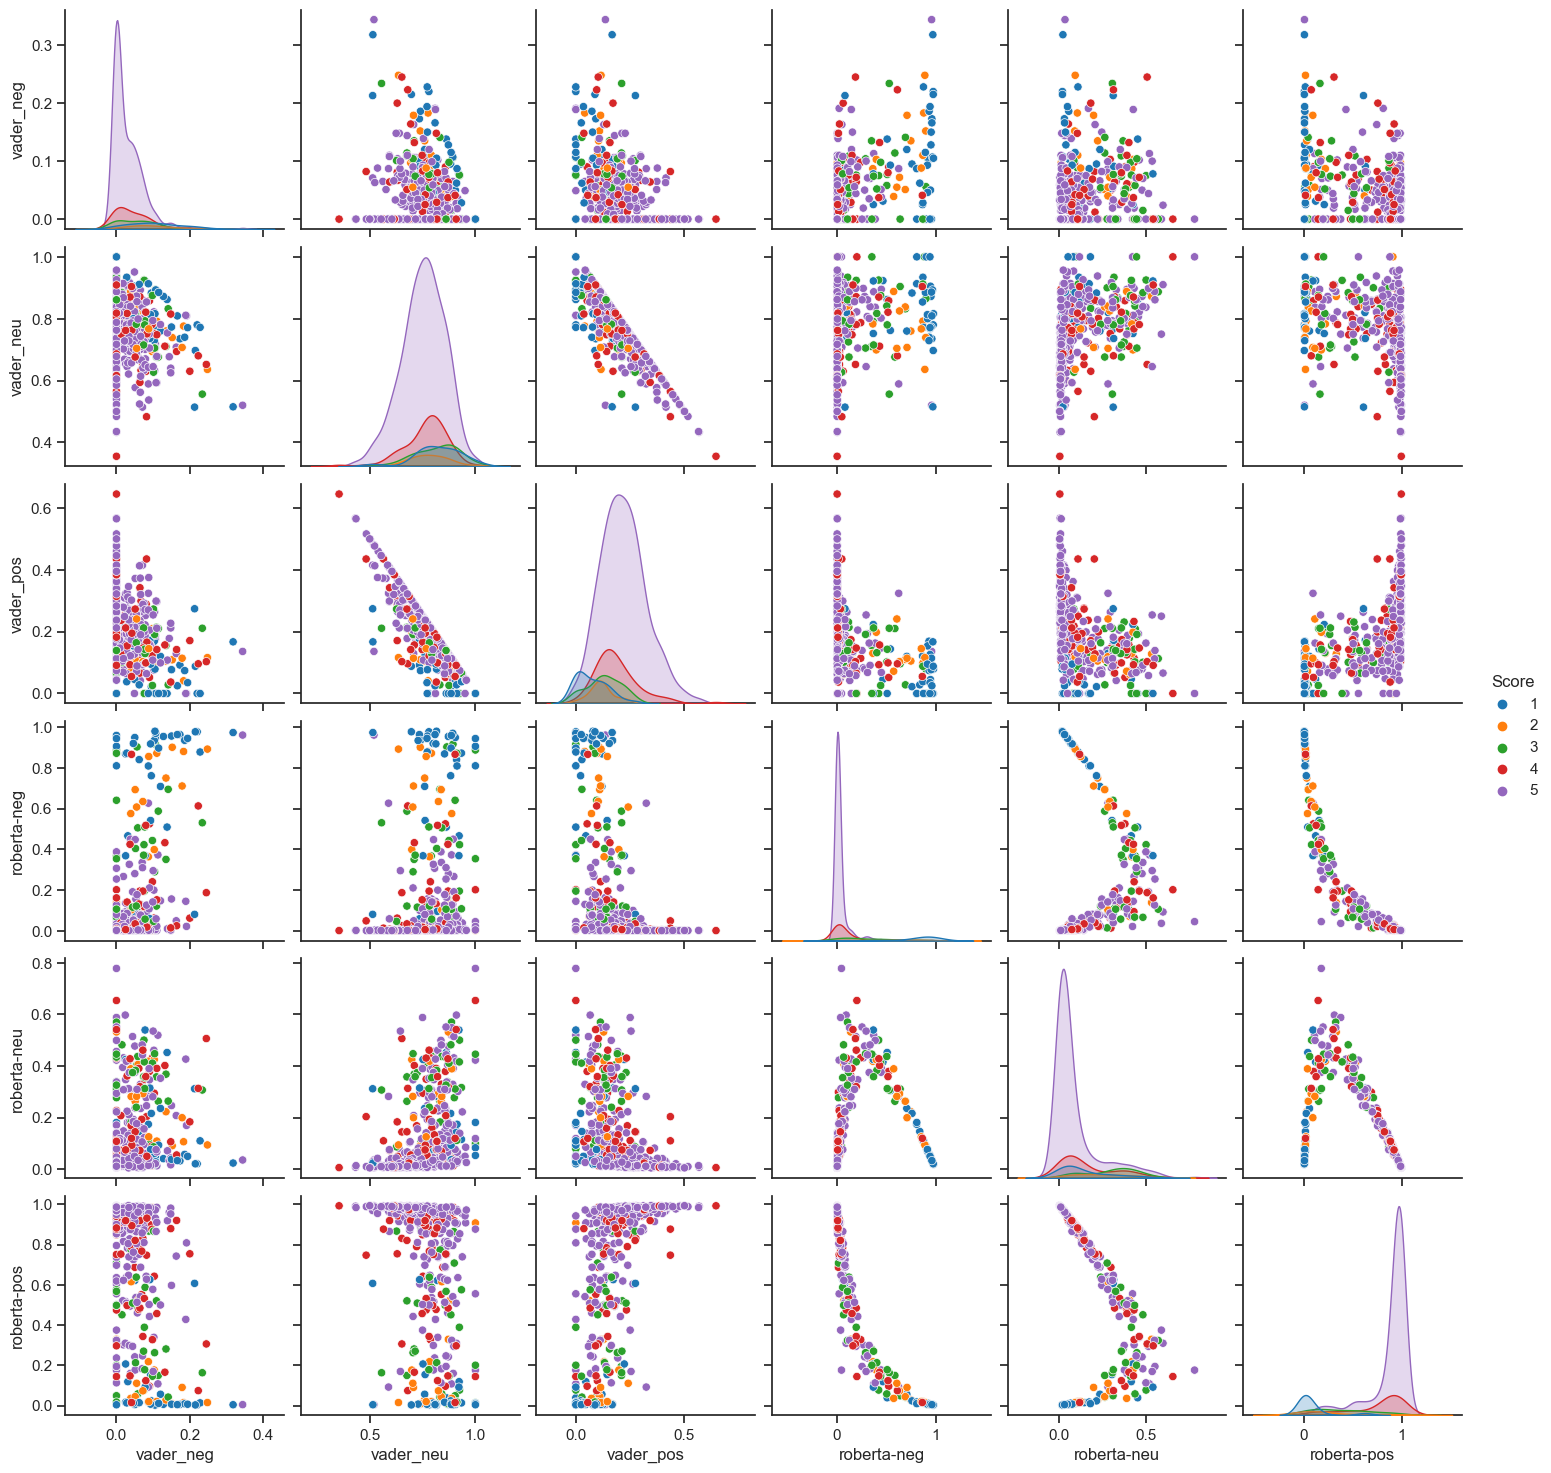

In [205]:
sns.set(style="ticks")
sns.pairplot(
    data=results_df,
    vars=["vader_neg", "vader_neu", "vader_pos", "roberta-neg", "roberta-neu", "roberta-pos"],
    hue="Score",
    palette="tab10"
)
plt.show()

> In VADER, the positive reviews are more so onto the right 

> Looks like  a lot is going on here but one thing that we notice here is the five star reviews are this purple ish color and if we look at vader the positive reviews are more to the right on for these five star reviews for the roberta model.

> you can see it's way over to the right and then we can see that there are some correlations between the roberta model and the vader model it's a little hard to see exactly if there are correlations.
but one thing that becomes very clear is that the vader model is a little bit less confident in all of its predictions compared to the roberta model which really separates
the positivity and neutral and negative scores for each of these predicted values.
> Also, if you look here this um positive and neutral like the roberta model has very high scores for the five stars and most of these one stars are very low in positivity um sentiment scoring so that's much better than VADER model

Vader model is less confident than the ROBERTA model. that thing is for sure verz high scores for  5 stars and sentiment scoring for positivity.

# Reviewing some Examples.

* Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples where the model scoring and review score differ the most.



In [212]:
results_df.query('Score == 1') \
 .sort_values('roberta-pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

so this is very nuanced sentence and we can see that it starts off being sort of positive at i felt energized
it lasted 45 minutes the model is getting confused and thinking this is more of a positive statement than we can tell that this is saying negative
 
by the end of the statement. 
so that was interesting and it makes sense .

**doing the same thing with the with the vader score**
 so look at the most positive score for a once rating it says so we canceled the order.... it was cancelled without any problem that is a positive note so they actually were used the wordpositive and without any problem seems positive but it is a negative review and it's being a little sarcastic i guess a little tongue-in-cheek and the
 model does not pick on up on that especially the vader type of model which is only looking at a bag of words for all of this sentence and and the score of each word individually.

  **negative sentiment five star review**
the roberta model first so we'll switch to a five-star review and we'll look at the top negative sentence
it says this was so delicious but too bad i ate them too fast and gained two pounds my fault okay so it is sort of a negative sentiment but a positive review that's kind of weird that that one came
up and then we'll do the exact same thing for the vader and it happens to be the exact same one so the both models got i guess you could say confused but maybe this actually is a negative sentiment for a positive review so maybe it did a better job than what we would expect to.


 

In [213]:
results_df.query('Score == 1') \
 .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [215]:
results_df.query('Score == 5') \
 .sort_values('roberta-neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [217]:
results_df.query('Score == 5') \
 .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Transformers Pipeline just for self study


Easier way to run sentiment pipelines

In [219]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


c:\Users\raksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\raksh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [220]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [221]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [222]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

#### The End